<a href="https://colab.research.google.com/github/naoki-yoshi/Task/blob/master/task13_%E3%82%A2%E3%83%A4%E3%83%A1%E4%BA%8C%E5%80%A4%E5%88%86%E9%A1%9E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#【課題1】練習のために特徴量とカテゴリを選択

必要なライブラリを読み込む

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris

## 【課題1】練習のために特徴量とカテゴリを選択

In [3]:
iris_dataset = load_iris()
X = pd.DataFrame(iris_dataset.data, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
y = pd.DataFrame(iris_dataset.target, columns=["Species"])
df = pd.concat([X, y], axis=1)

df_selected = df.query("Species == [1, 2]").loc[:, ["sepal_length", "petal_length", "Species"]]
df_selected.head()

,sepal_length,petal_length,Species
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1


In [4]:
df_selected

,sepal_length,petal_length,Species
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2
148,6.2,5.4,2


## 【問題2】データの分析

### 散布図を作成

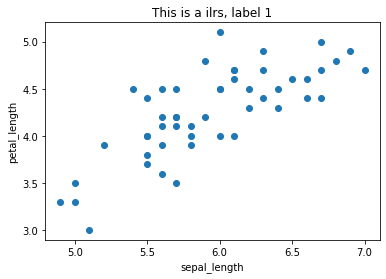

In [5]:
x_1 = df_selected[df_selected.Species==1].iloc[:, 0]
y_1 = df_selected[df_selected.Species==1].iloc[:, 1]


plt.title("This is a ilrs, label 1")
plt.xlabel("sepal_length")
plt.ylabel("petal_length")

plt.scatter(x_1,y_1)

箱ひげ図を作成

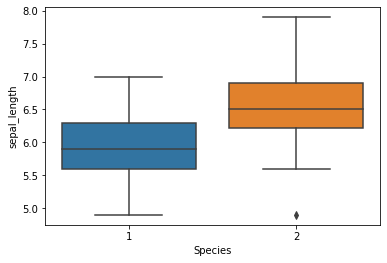

In [6]:
sns.boxplot(x="Species", y="sepal_length", data=df_selected)

バイオリン図を作成

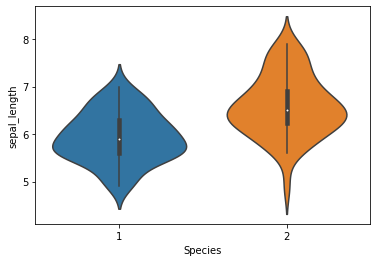

In [7]:
sns.violinplot(x="Species", y="sepal_length", data=df_selected)

## 【問題3】前処理・訓練データと検証データの分割

In [8]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(df_selected.iloc[:,0:2],df_selected.loc[:,"Species"],random_state=0)

In [9]:
y_test

76     1
136    2
52     1
105    2
125    2
143    2
66     1
123    2
104    2
145    2
103    2
142    2
128    2
63     1
57     1
80     1
72     1
74     1
83     1
58     1
93     1
112    2
53     1
121    2
95     1
Name: Species, dtype: int64

## 【問題4】前処理・標準化

In [10]:
from sklearn.preprocessing import StandardScaler
scaler =  StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_transform = scaler.transform(X_test)

In [11]:
X_test_transform

array([[ 0.79170754, -0.12093628],
       [ 0.03817879,  0.84655399],
       [ 0.94241329,  0.        ],
       [ 1.99735354,  2.05591684],
       [ 1.39453054,  1.33029913],
       [ 0.79170754,  1.20936285],
       [-1.01676146, -0.48374514],
       [ 0.03817879,  0.        ],
       [ 0.33959029,  1.08842656],
       [ 0.64100179,  0.36280885],
       [ 0.03817879,  0.84655399],
       [-0.71534996,  0.24187257],
       [ 0.18888454,  0.84655399],
       [-0.26323271, -0.24187257],
       [-2.07170171, -1.93498056],
       [-1.16746721, -1.33029913],
       [ 0.03817879,  0.        ],
       [ 0.18888454, -0.72561771],
       [-0.41393846,  0.24187257],
       [ 0.49029604, -0.36280885],
       [-1.92099596, -1.93498056],
       [ 0.79170754,  0.72561771],
       [-1.16746721, -1.08842656],
       [-1.01676146,  0.        ],
       [-0.86605571, -0.84655399]])

##【問題5】学習と推定

In [12]:
from sklearn.neighbors import KNeighborsClassifier

neigh_1 = KNeighborsClassifier(n_neighbors=1)
neigh_3 = KNeighborsClassifier(n_neighbors=3)
neigh_5 = KNeighborsClassifier(n_neighbors=5)

neigh_1.fit(X_train_std,y_train)
neigh_3.fit(X_train_std,y_train)
neigh_5.fit(X_train_std,y_train)

y_pred_neigh_1 = neigh_1.predict(X_test_transform)
y_pred_neigh_3 = neigh_3.predict(X_test_transform)
y_pred_neigh_5 = neigh_5.predict(X_test_transform)


In [13]:
print(y_pred_neigh_1)
print(y_pred_neigh_3)
print(y_pred_neigh_5)

[1 2 2 2 2 2 1 2 2 1 2 2 2 1 1 1 2 1 2 1 1 2 1 2 1]
[1 2 1 2 2 2 1 2 2 2 2 2 2 1 1 1 2 1 2 1 1 2 1 2 1]
[1 2 1 2 2 2 1 2 2 2 2 2 2 2 1 1 2 1 2 1 1 2 1 2 1]


##【問題6】評価

neigh_1の評価

In [14]:
from sklearn import metrics

#Accuracy（正解率）
metrics.accuracy_score(y_test,y_pred_neigh_1)
print("正解率は:{}".format(metrics.accuracy_score(y_test,y_pred_neigh_1)))

#Precision（適合率）
metrics.precision_score(y_test,y_pred_neigh_1)
print("適合率は{}".format(metrics.precision_score(y_test,y_pred_neigh_1)))

#Recall（再現率）
metrics.recall_score(y_test,y_pred_neigh_1)
print("再現率は{}".format(metrics.precision_score(y_test,y_pred_neigh_1)))

#F値
metrics.f1_score(y_test,y_pred_neigh_1)
print("F値は{}".format(metrics.precision_score(y_test,y_pred_neigh_1)))


正解率は:0.84
適合率は0.9090909090909091
再現率は0.9090909090909091
F値は0.9090909090909091


neigh_3の評価

In [15]:
#Accuracy（正解率）
metrics.accuracy_score(y_test,y_pred_neigh_3)
print("正解率は:{}".format(metrics.accuracy_score(y_test,y_pred_neigh_3)))

#Precision（適合率）
metrics.precision_score(y_test,y_pred_neigh_3)
print("適合率は{}".format(metrics.precision_score(y_test,y_pred_neigh_3)))

#Recall（再現率）
metrics.recall_score(y_test,y_pred_neigh_3)
print("再現率は{}".format(metrics.precision_score(y_test,y_pred_neigh_3)))

#F値
metrics.f1_score(y_test,y_pred_neigh_3)
print("F値は{}".format(metrics.precision_score(y_test,y_pred_neigh_3)))


正解率は:0.92
適合率は1.0
再現率は1.0
F値は1.0


neigh_5の評価

In [16]:
#Accuracy（正解率）
metrics.accuracy_score(y_test,y_pred_neigh_5)
print("正解率は:{}".format(metrics.accuracy_score(y_test,y_pred_neigh_5)))

#Precision（適合率）
metrics.precision_score(y_test,y_pred_neigh_5)
print("適合率は{}".format(metrics.precision_score(y_test,y_pred_neigh_5)))

#Recall（再現率）
metrics.recall_score(y_test,y_pred_neigh_5)
print("再現率は{}".format(metrics.precision_score(y_test,y_pred_neigh_5)))

#F値
metrics.f1_score(y_test,y_pred_neigh_5)
print("F値は{}".format(metrics.precision_score(y_test,y_pred_neigh_5)))

正解率は:0.88
適合率は1.0
再現率は1.0
F値は1.0


##【問題7】可視化

In [17]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(np.unique(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

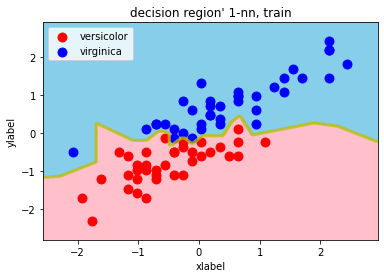

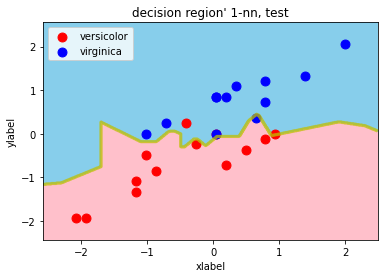

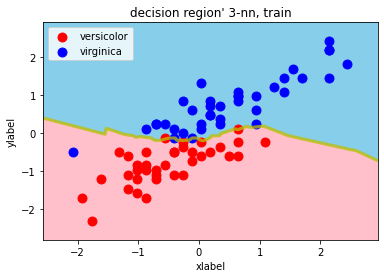

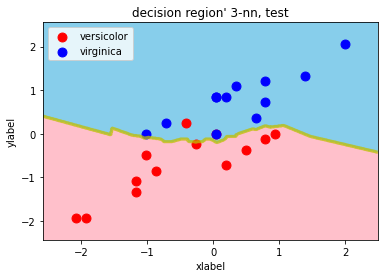

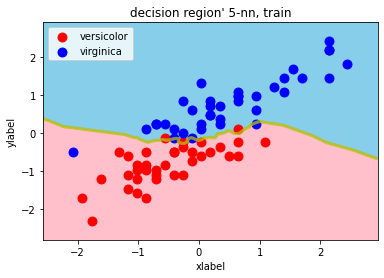

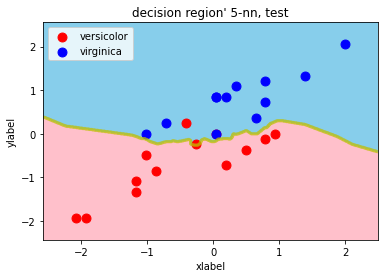

In [18]:
models = [neigh_1, neigh_3, neigh_5]
# プロットのタイトルを変数に格納
model_names = ["1-nn", "3-nn", "5-nn"]

# 可視化
for model, model_name in zip(models, model_names):
    decision_region(X_train_std, y_train, model, title="decision region' {}, {}".format(model_name, "train"))
    decision_region(X_test_transform, y_test, model, title="decision region' {}, {}".format(model_name, "test"))

##【問題8】他の手法の学習

In [19]:
#各モデルをimportする
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

ロジスティック回帰

In [20]:
#学習
logistic_reg = LogisticRegression()#インスタンス化
logistic_reg.fit(X_train_std,y_train)
y_pred_logistic_reg = logistic_reg.predict(X_test_transform)

In [21]:
#Accuracy（正解率）
metrics.accuracy_score(y_test,y_pred_logistic_reg)
print("正解率は:{}".format(metrics.accuracy_score(y_test,y_pred_logistic_reg)))

#Precision（適合率）
metrics.precision_score(y_test,y_pred_logistic_reg)
print("適合率は{}".format(metrics.precision_score(y_test,y_pred_logistic_reg)))

#Recall（再現率）
metrics.recall_score(y_test,y_pred_logistic_reg)
print("再現率は{}".format(metrics.precision_score(y_test,y_pred_logistic_reg)))

#F値
metrics.f1_score(y_test,y_pred_logistic_reg)
print("F値は{}".format(metrics.precision_score(y_test,y_pred_logistic_reg)))

正解率は:0.92
適合率は1.0
再現率は1.0
F値は1.0


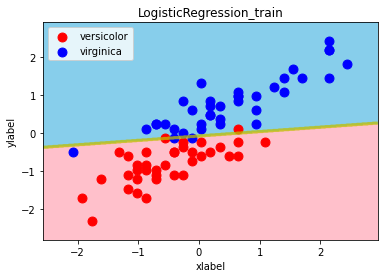

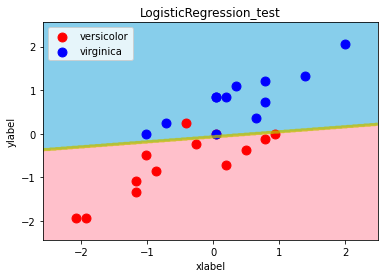

In [22]:
#可視化
decision_region(X_train_std, y_train,logistic_reg, title="LogisticRegression_train")
decision_region(X_test_transform, y_test,logistic_reg, title="LogisticRegression_test")

SVC

In [23]:
#学習
svc = SVC()#インスタンス化
svc.fit(X_train_std,y_train)
y_pred_svc = svc.predict(X_test_transform)

In [24]:
#評価
#Accuracy（正解率）
metrics.accuracy_score(y_test,y_pred_svc)
print("正解率は:{}".format(metrics.accuracy_score(y_test,y_pred_svc)))

#Precision（適合率）
metrics.precision_score(y_test,y_pred_svc)
print("適合率は{}".format(metrics.precision_score(y_test,y_pred_svc)))

#Recall（再現率）
metrics.recall_score(y_test,y_pred_svc)
print("再現率は{}".format(metrics.precision_score(y_test,y_pred_svc)))

#F値
metrics.f1_score(y_test,y_pred_svc)
print("F値は{}".format(metrics.precision_score(y_test,y_pred_svc)))

正解率は:0.92
適合率は1.0
再現率は1.0
F値は1.0


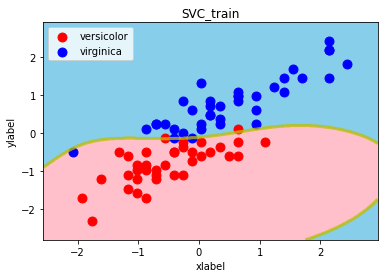

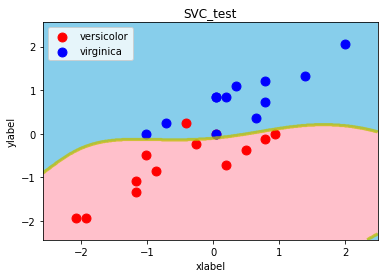

In [26]:
#可視化
decision_region(X_train_std, y_train, svc, title="SVC_train")
decision_region(X_test_transform, y_test, svc, title="SVC_test")

決定木

In [29]:
#学習
tree_class = DecisionTreeClassifier()#インスタンス化
tree_class.fit(X_train_std,y_train)
y_pred_tree = tree_class.predict(X_test_transform)

In [34]:
#評価
#Accuracy（正解率）
metrics.accuracy_score(y_test,y_pred_tree)
print("正解率は:{}".format(metrics.accuracy_score(y_test,y_pred_tree)))

#Precision（適合率）
metrics.precision_score(y_test,y_pred_tree)
print("適合率は{}".format(metrics.precision_score(y_test,y_pred_tree)))

#Recall（再現率）
metrics.recall_score(y_test,y_pred_tree)
print("再現率は{}".format(metrics.precision_score(y_test,y_pred_tree)))

#F値
metrics.f1_score(y_test,y_pred_tree)
print("F値は{}".format(metrics.precision_score(y_test,y_pred_tree)))

正解率は:0.88
適合率は1.0
再現率は1.0
F値は1.0


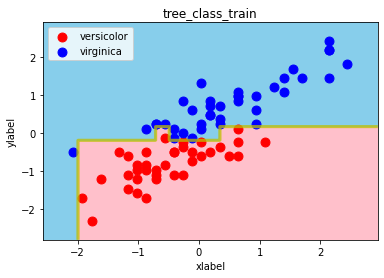

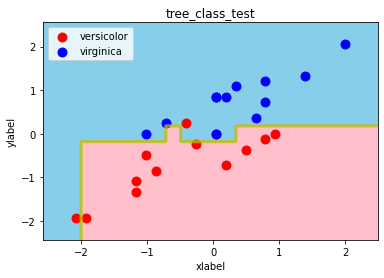

In [31]:
#可視化
decision_region(X_train_std, y_train, tree_class, title="tree_class_train")
decision_region(X_test_transform, y_test, tree_class, title="tree_class_test")

ランダムフォレスト

In [33]:
#学習
random_class = RandomForestClassifier()#インスタンス化
random_class.fit(X_train_std,y_train)
y_pred_random = random_class.predict(X_test_transform)

In [35]:
#評価
#Accuracy（正解率）
metrics.accuracy_score(y_test,y_pred_random)
print("正解率は:{}".format(metrics.accuracy_score(y_test,y_pred_random)))

#Precision（適合率）
metrics.precision_score(y_test,y_pred_random)
print("適合率は{}".format(metrics.precision_score(y_test,y_pred_random)))

#Recall（再現率）
metrics.recall_score(y_test,y_pred_random)
print("再現率は{}".format(metrics.precision_score(y_test,y_pred_random)))

#F値
metrics.f1_score(y_test,y_pred_random)
print("F値は{}".format(metrics.precision_score(y_test,y_pred_random)))

正解率は:0.88
適合率は1.0
再現率は1.0
F値は1.0


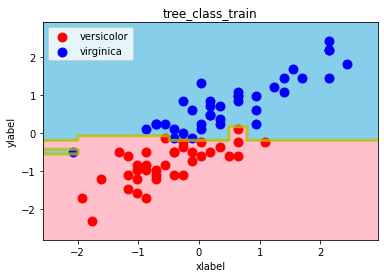

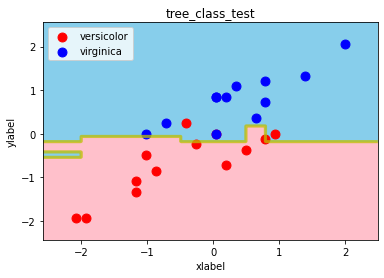

In [36]:
#可視化
decision_region(X_train_std, y_train, random_class, title="tree_class_train")
decision_region(X_test_transform, y_test, random_class, title="tree_class_test")